# Data Analysis for Prosper Loan Data
## by Arenna Bu

## Preliminary Wrangling

> Prosper is a marketplace lending company that provides unsecured personal loans for any purpose. This dataset, includes 61 columns and 113937 rows, provides valuable information about loan listings and related variables including borrower as well as lender information. In this analysis, we are interested in focusing on variable Borrower's Annual Percentage Rate (APR) for the loan - will be referred as APR in the rest of this notebook, and the factors that have an impact on borrower's APR.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# Load data

In [2]:
df = pd.read_csv('prosperLoanData.csv')

# Assess Data

In [3]:
pd.set_option('display.max_column',None)
pd.set_option('display.max_rows',None)

In [4]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [6]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,113937.000000,106312.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113937.00000,113937.000000,113240.000000,112778.000000,113240.000000,106315.000000,112947.000000,113240.000000,106333.000000,1.063330e+05,106333.000000,106393.000000,106393.000000,106393.000000,106393.000000,105383.000000,1.139370e+05,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,18928.000000,113937.000000,16952.000000,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,2.774209,96.071582,685.567731,704.567731,10.317192,9.260164,26.754539,6.96979,398.292161,1.435085,5.584405,0.592052,984.507059,4.154984,0.312646,0.015094,1.759871e+04,0.561309,11210.225447,23.230034,0.885897,0.802327,0.275947,5.608026e+03,1.421100,22.934345,22.271949,0.613629,0.048540,8472.311961,2930.313906,-3.223214,152.816539,16.268464,31.896882,69444.474271,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,3.996797,94.480605,66.458275,66.458275,5.457866,5.022644,13.637871,4.63097,447.159711,2.437507,6.429946,1.978707,7158.270157,10.160216,0.727868,0.154092,3.293640e+04,0.317918,19818.361309,11.871311,0.148179,1.097637,0.551759,7.478497e+03,0.764042,19.249584,18.830425,2.446827,0.556285,7395.507650,3806.635075,50.063567,466.320254,9.005898,29.974184,38930.479610,6245.80058,192.697812,4790.907234,4069.527670,1183.414168,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,0.000000,0.000000,1.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000

### What is the structure of your dataset?

> There is 81 columns and 113937 rows in this dataset.

### What is/are the main feature(s) of interest in your dataset?

> This dataset has rich personal information on the borrowers, such as their employment, income and home ownership information, which are very important to understanding how different factors impact the APR they got on their loan. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The APR, borrowers' prosper score, Income range,loan original amount, loan status. 

# Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

#### APR 

In [7]:
df.BorrowerAPR.value_counts()

0.35797    3672
0.35643    1644
0.37453    1260
0.30532     902
0.29510     747
0.35356     721
0.29776     707
0.15833     652
0.24246     605
0.24758     601
0.12528     559
0.17359     549
0.15324     547
0.27462     534
0.27285     506
0.13799     489
0.15713     482
0.12691     456
0.25781     444
0.20735     433
0.26528     430
0.19501     425
0.20462     420
0.23318     416
0.15629     412
0.11296     409
0.34621     406
0.30564     399
0.20200     395
0.29537     391
0.32446     378
0.14714     371
0.15223     363
0.17522     362
0.19859     362
0.21434     357
0.31032     355
0.33553     351
0.31790     350
0.17722     349
0.28780     347
0.35838     346
0.14206     345
0.33973     345
0.25259     342
0.33215     341
0.30285     340
0.20358     334
0.22712     327
0.26681     326
0.21290     322
0.25013     322
0.18136     320
0.13697     320
0.21025     316
0.19645     314
0.22108     314
0.30899     312
0.16324     306
0.31375     304
0.19364     300
0.20053     297
0.21566 

In [8]:
df.BorrowerAPR.describe()

count    113912.000000
mean          0.218828
std           0.080364
min           0.006530
25%           0.156290
50%           0.209760
75%           0.283810
max           0.512290
Name: BorrowerAPR, dtype: float64

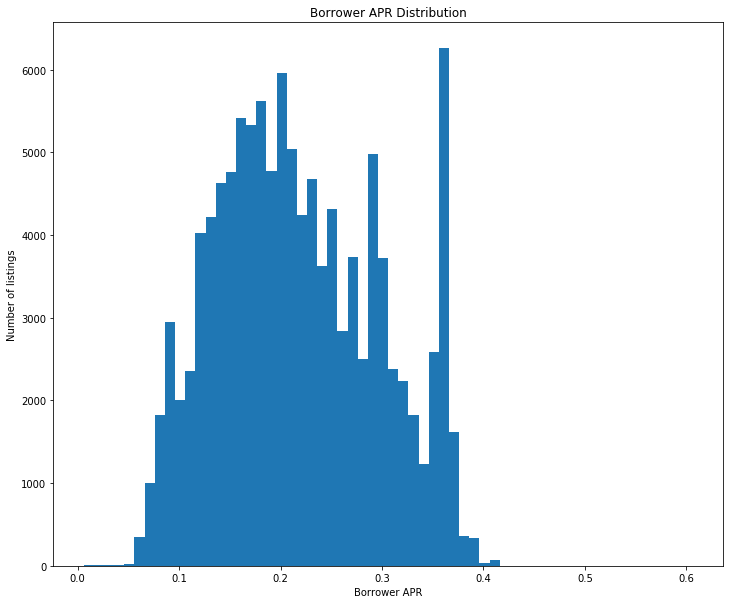

In [9]:
plt.figure(figsize=(12,10))
bin_edges = np.arange(0.006, 0.513+0.1, 0.01)
plt.hist(data = df, x ='BorrowerAPR', bins =bin_edges);
plt.xlabel('Borrower APR')
plt.ylabel('Number of listings')
plt.title('Borrower APR Distribution');

>Comments: APRs within the rage of 0.35-0.38 are the most common rates, followed by the APRs within the rage of 0.15-0.25.

#### Borrower State

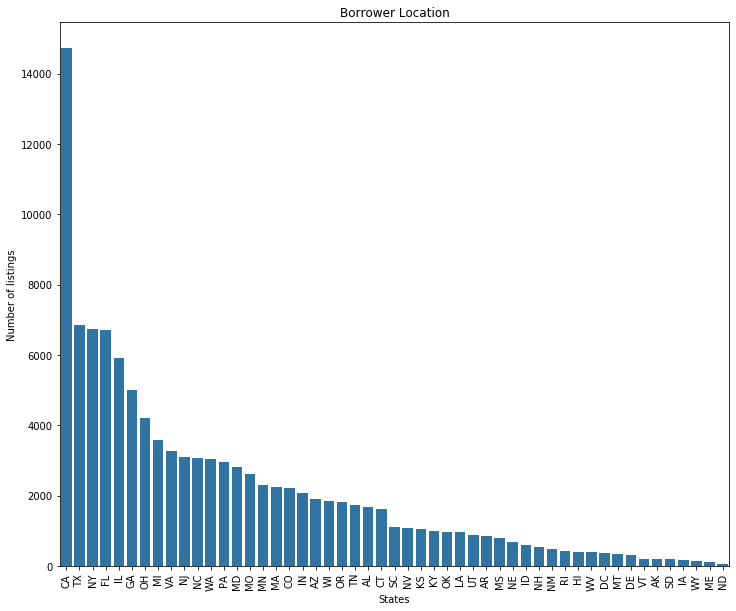

In [10]:
plt.figure(figsize=(12,10))
color= sb.color_palette()[0]
order = df['BorrowerState'].value_counts(sort=True).index
sb.countplot(data=df, x='BorrowerState', color=color, order=order);
plt.xlabel('States')
plt.ylabel('Number of listings')
plt.title('Borrower Location')
plt.xticks(rotation = 90);

> Comments: Interestingly, California has the highest number of loan listings, way higher than rest of the states. 

#### Income Range

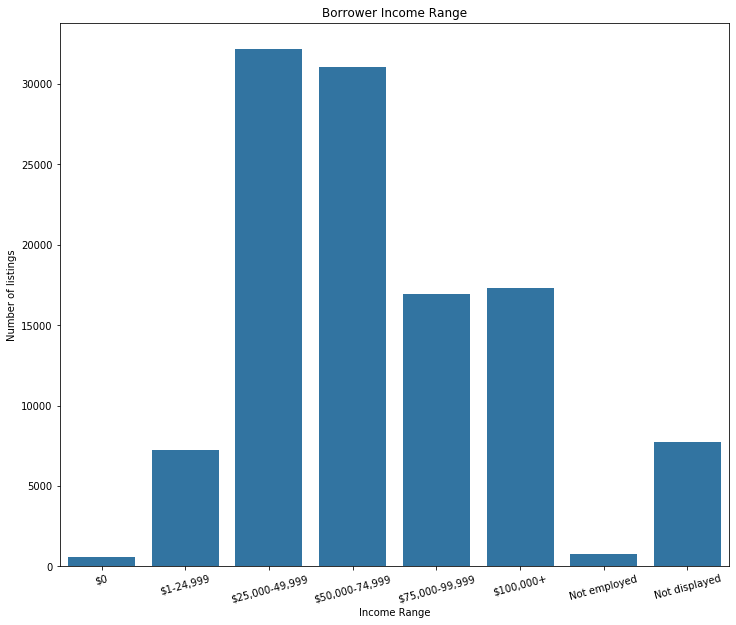

In [11]:
plt.figure(figsize=(12,10))
color= sb.color_palette()[0]
order_income = ['$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+', 'Not employed', 'Not displayed']
sb.countplot(data=df, x='IncomeRange', color=color,order=order_income);
plt.xlabel('Income Range')
plt.ylabel('Number of listings')
plt.title('Borrower Income Range')
plt.xticks(rotation = 15);

> Comments: Majority Prosper users had the income rage from 25,000 to 74,999, followed by the users who had income rage from 75,000 to 100,000+

#### Loan Original Amount

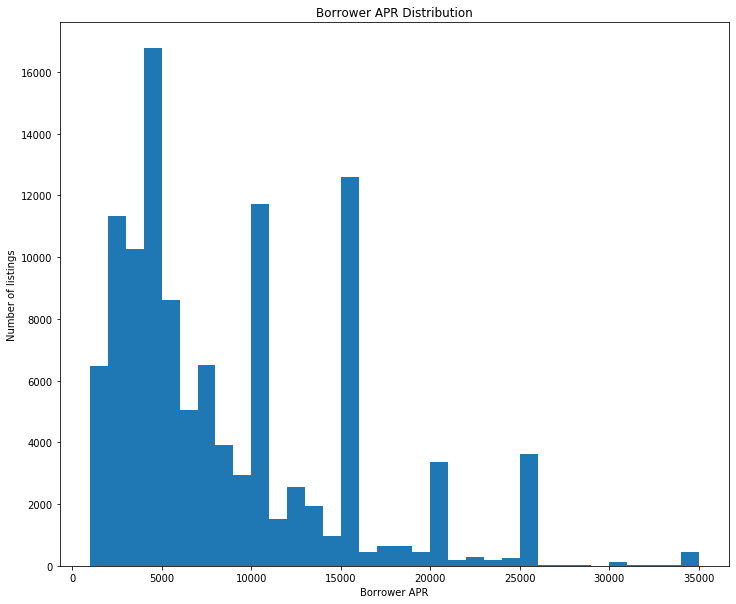

In [12]:
plt.figure(figsize=(12,10))
bin_edges = np.arange(1000, 35000+1000, 1000)
plt.hist(data = df, x ='LoanOriginalAmount', bins =bin_edges);
plt.xlabel('Borrower APR')
plt.ylabel('Number of listings')
plt.title('Borrower APR Distribution');

> Comments: $4,000,  $15,000 and $10,000 are the most popular loan amounts users request.

#### Loan Status

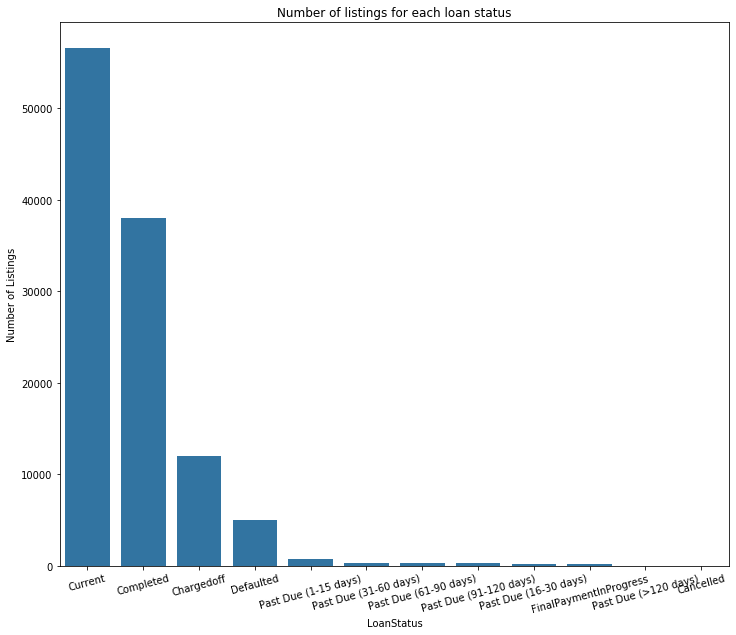

In [13]:
plt.figure(figsize=(12, 10))
color= sb.color_palette()[0]
order = df['LoanStatus'].value_counts(sort=True).index
sb.countplot(data=df, x='LoanStatus', color=color, order=order);
plt.title('Number of listings for each loan status');
plt.xlabel('LoanStatus');
plt.ylabel('Number of Listings');
plt.xticks(rotation=15);

> Comments: Current and completed loans account for the majority of the loan status in our dataset, compared to the charged off and defaulted loans, indicating a healthy financial environment. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> In this dataset, APR has a minimum value of 0.006 and a maximum value of 0.513, with which, the rage of 0.35-0.38 are the most common rates, followed by the APRs within the rage of 0.15-0.25. The range 0.35-0.38 is very interesting, because the rest of the APRs are forming a normal distribution. Transformations I have done is to decide on the bin size based on the min and max of the APR.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Interestingly, California has the highest number of loan listings, way higher than rest of the states. This may due to the fact that Prosper is California based, and California is famous for its innovative environment. I didn't need to perform any perations on the data to reach the objectives. 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

#### APR VS. Prosper score 

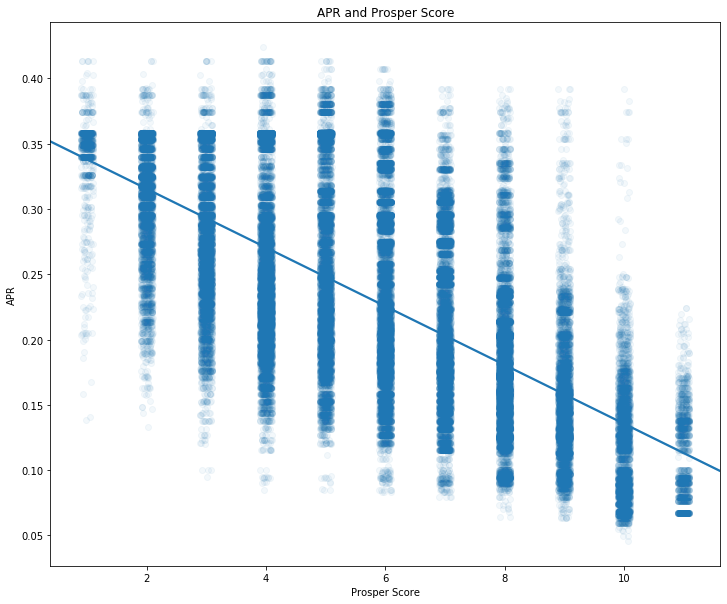

In [14]:
plt.figure(figsize=(12, 10))
sb.regplot(data=df, x='ProsperScore', y='BorrowerAPR', x_jitter =0.1,
          scatter_kws = {'alpha': 1/20});
plt.title('APR and Prosper Score');
plt.xlabel('Prosper Score');
plt.ylabel('APR');

> Comments:  A higher prosper score leads to a lower APR for borrowers.

#### APR VS. Year

In [15]:
df['Year'] = df.ListingCreationDate.str.split('-').str[0]

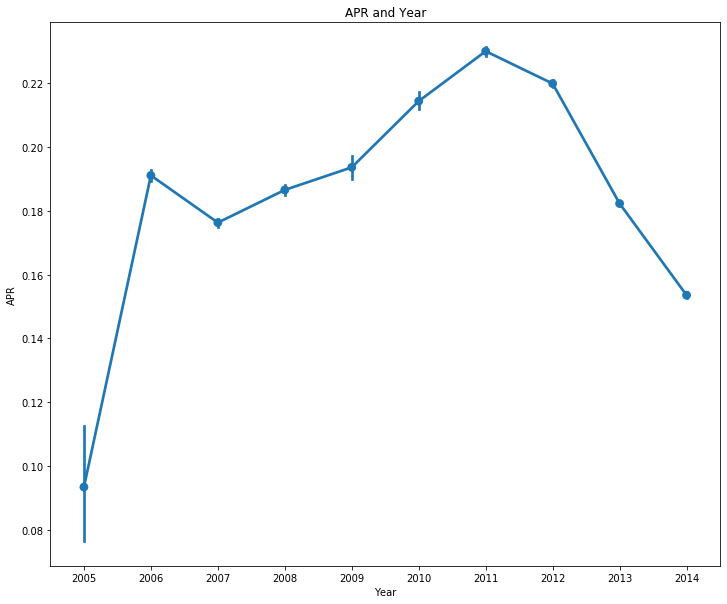

In [16]:
plt.figure(figsize=(12, 10))
sb.pointplot(data=df, x='Year', y='BorrowerRate');
plt.title('APR and Year');
plt.ylabel('APR');

> Comments: In general, APR increased dramatically from 2005 to 2006. After a slight drop in 2007, APR reached its highest in 2011. 

#### APR VS. Occupation

In [17]:
# select top 10 most common occupations in this dataset
list=df.Occupation.value_counts(sort=True).head(10).index
df_occupation = df.loc[df['Occupation'].isin (list)]

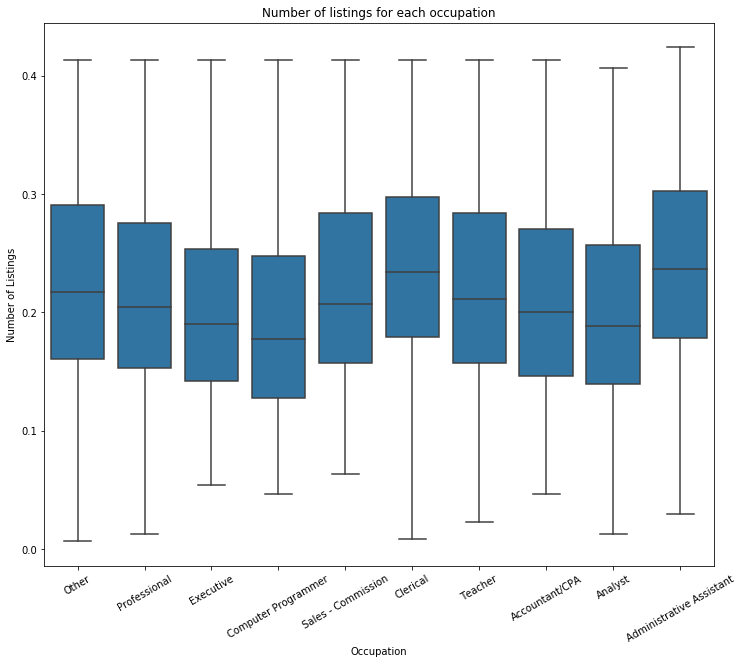

In [18]:
plt.figure(figsize=(12, 10))
color= sb.color_palette()[0]
order_occupation = df.Occupation.value_counts(sort=True).index
sb.boxplot(data=df_occupation, x='Occupation', y='BorrowerAPR', color=color);
plt.title('Number of listings for each occupation');
plt.ylabel('Number of Listings');
plt.xticks(rotation=30);

> Comments: Computer programmers tend to receive a lower APR, followed by analyst, this finding aligns with the fact that majority borrowers are California based. 

#### APR VS. Income Range

In [19]:
df.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

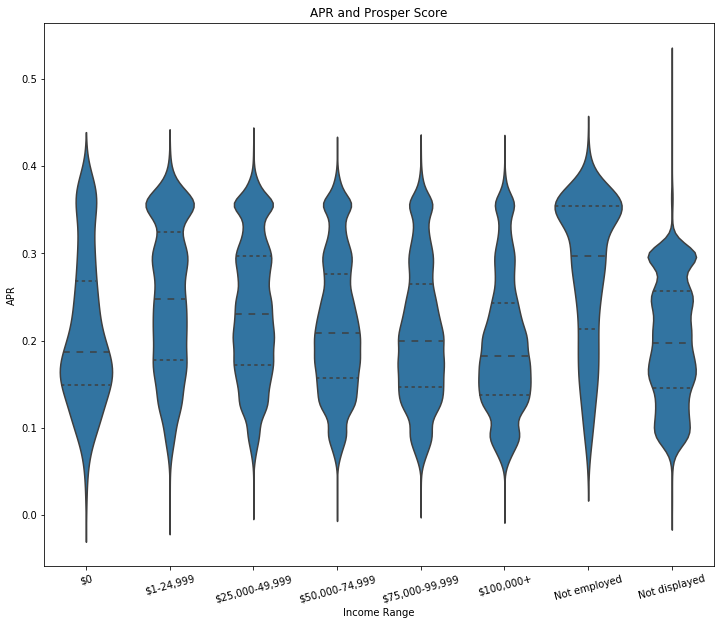

In [20]:
plt.figure(figsize=(12, 10))
sb.violinplot(data=df, x='IncomeRange', y='BorrowerAPR', color=color,
             inner = 'quartile', order=order_income);
plt.xticks(rotation=15);
plt.title('APR and Prosper Score');
plt.xlabel('Income Range');
plt.ylabel('APR');

> Comments: Not surprisingly, borrowers who were not employed had the highest APR. A negative correlation between income rage and APR can be observed. 

#### APR VS. Employment Status Duration

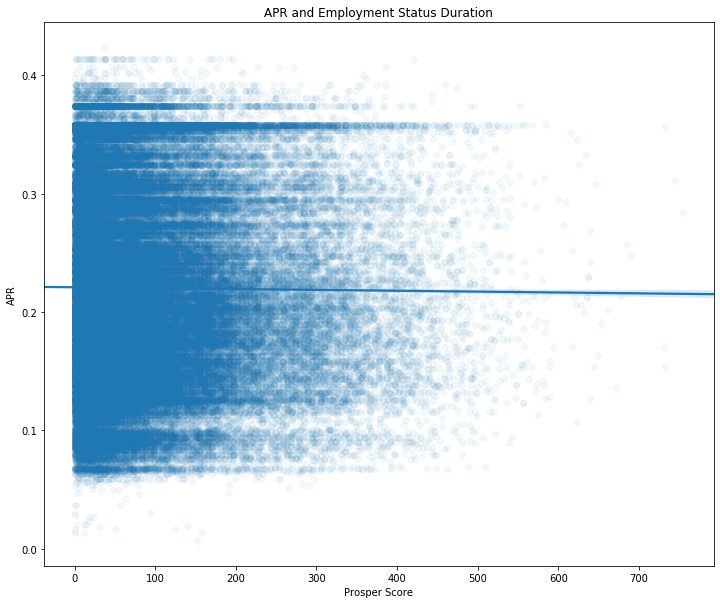

In [21]:
plt.figure(figsize=(12, 10))
sb.regplot(data=df, x='EmploymentStatusDuration', y='BorrowerAPR', x_jitter =0.1,
          scatter_kws = {'alpha': 1/20});
plt.title('APR and Employment Status Duration');
plt.xlabel('Prosper Score');
plt.ylabel('APR');

> Comments: There is no obvious relationship between APR and employment status duration based on this regplot.

#### APR VS. Is Borrower Home owner

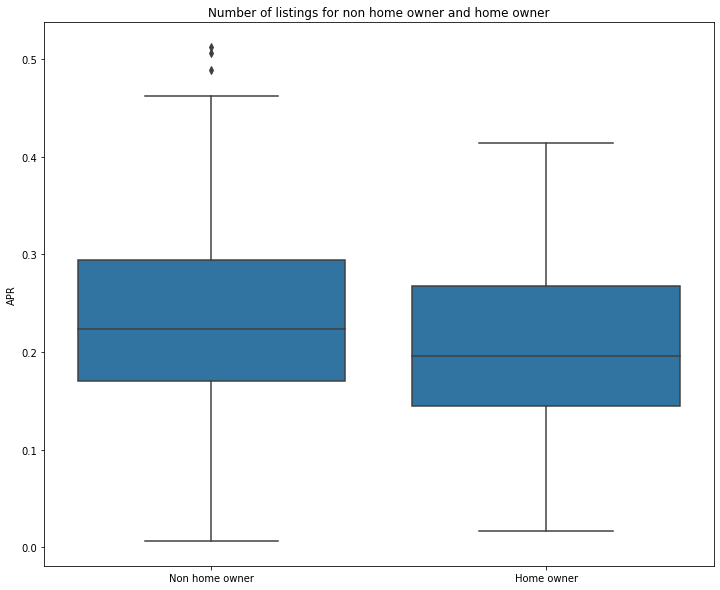

In [22]:
plt.figure(figsize=(12, 10))
color= sb.color_palette()[0]
sb.boxplot(data=df, x='IsBorrowerHomeowner', y='BorrowerAPR', color=color);
plt.title('Number of listings for non home owner and home owner');
plt.ylabel('APR');
plt.xlabel(None)
plt.xticks(np.arange (2), ('Non home owner', 'Home owner'));

> Comments: Home owners tend to receive a lower APR than non home owners. 

#### APR VS. OpenCreditLines

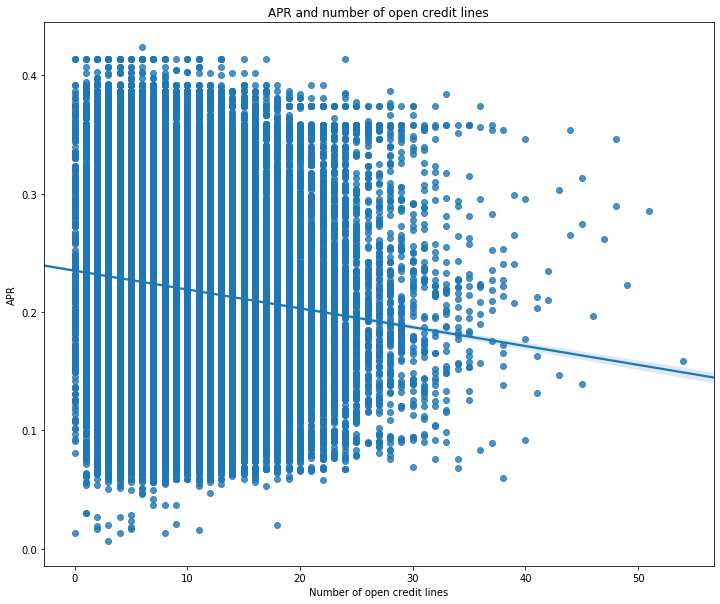

In [23]:
plt.figure(figsize=(12, 10))
sb.regplot(data=df, x='OpenCreditLines', y='BorrowerAPR')
plt.title('APR and number of open credit lines');
plt.ylabel('APR');
plt.xlabel('Number of open credit lines');

> Comments: Borrowers who had a larger number of open credit lines (at the time the credit profile was pulled) tend to receive a lower APR.

#### APR VS. LoanOriginalAmount

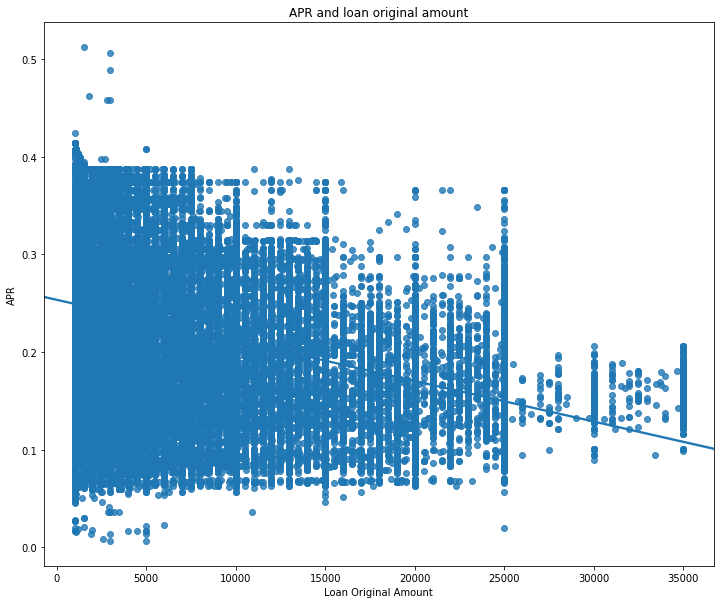

In [24]:
plt.figure(figsize=(12, 10))
sb.regplot(data=df, x='LoanOriginalAmount', y='BorrowerAPR')
plt.title('APR and loan original amount');
plt.ylabel('APR');
plt.xlabel('Loan Original Amount');

> Comments: Borrowers with a higher loan original amount tend to receive a lower APR.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The borrowers with the following characteristics tend to receive a lower APR:
- a high prosper score
- working as a computer programmer or analyst
- high income
- is a home owner
- a high loan origial amount 
- a large amount of open credit lines

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The observed negative correlation between number of open credit lines and APR is surprising to me, because most open credit lines are unsecured, the more open credit lines a borrower has, the riskier it is for the lender. There is no obvious relationship between APR and employment status duration based on this regplot. 

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

#### APR vs. Prosper score vs. Borrower is a home owner

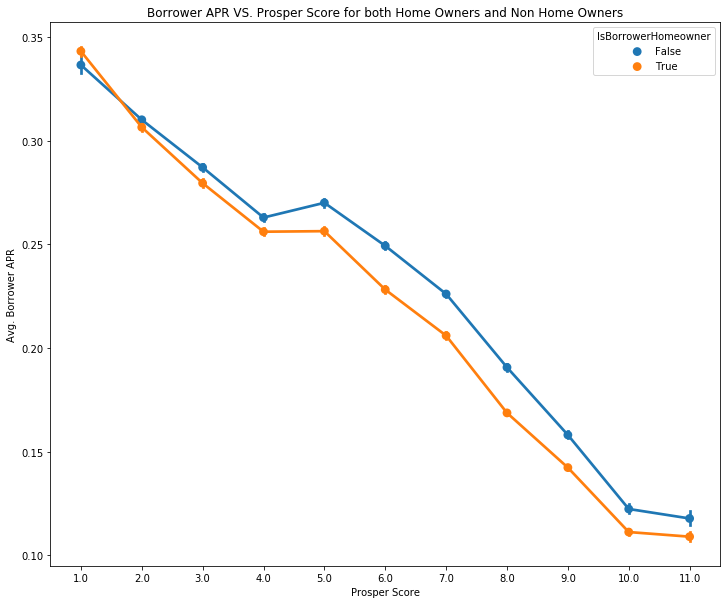

In [25]:
plt.figure(figsize=(12, 10))
sb.pointplot(data=df, x='ProsperScore', y='BorrowerAPR', hue='IsBorrowerHomeowner');
plt.xlabel('Prosper Score')
plt.ylabel('Avg. Borrower APR');
plt.title('Borrower APR VS. Prosper Score for both Home Owners and Non Home Owners');

> Comments: We already know that a higher prosper score can lead to a lower APR, in this plot, we can further prove that, with the same prosper score, borrowers who are home owner receive a lower APR. 

#### APR VS. various variables

In [26]:
vars=['BorrowerAPR', 'ProsperScore','LoanStatus','EstimatedLoss','BorrowerState','EmploymentStatus','EmploymentStatusDuration','Occupation', 'IsBorrowerHomeowner', 'OpenCreditLines', 'CurrentDelinquencies','RevolvingCreditBalance','IncomeRange', 'LoanOriginalAmount']

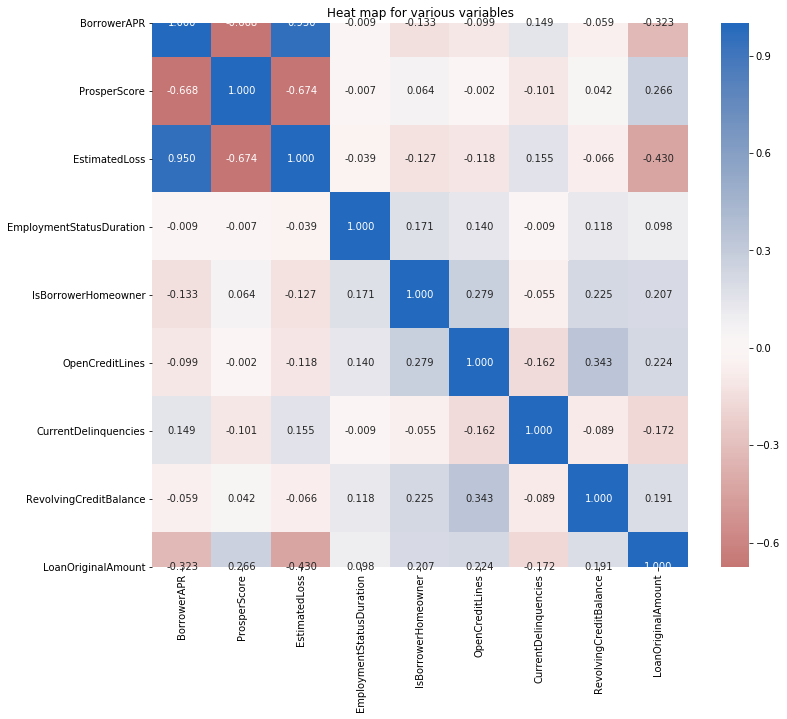

In [27]:
plt.figure(figsize=(12, 10))
sb.heatmap(df[vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center =0)
plt.yticks(rotation=0);
plt.title('Heat map for various variables');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Some positive correlations observed:
- APR and Estimated loss (0.95)
- Number of open credit line and revolving credit balance

> Some negative correlation observed: 
- APR and Prosper score (-0.668)
- APR and loan original amount 
- Estimated loss and prosper score (-0.674)
- Estimated loss and loan original amount


### Were there any interesting or surprising interactions between features?

> APR and estimated loss have the strongest positive correlation. Both APR and estimated loss are strongly negatively correlated with prosper score. 

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

In [ ]:
!jupyter nbconvert Prosper_Loan_Data_Slide_Deck.ipynb --to slides --post serve --template output_toggle

[NbConvertApp] Converting notebook Prosper_Loan_Data_Slide_Deck.ipynb to slides
[NbConvertApp] Writing 1157785 bytes to Prosper_Loan_Data_Slide_Deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Prosper_Loan_Data_Slide_Deck.slides.html
Use Control-C to stop this server
